In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.utils.class_weight import compute_class_weight

In [3]:
data = pd.read_csv('data.csv')

In [5]:
data.head()

,datetime,open,high,low,close,volume,reserve,funding_rates,mvrv,nrpl,nupl,stock_to_flow_reversion,sth_sopr,signal,RSI,9_ema,21_ema,50_ema,200_ema,Fear_and_Greed_Index
0,2020-07-16,9190.80,9216.02,9005.00,9130.11,8765.698589,2.889262e+06,0.009332,1.563972,-3.694023e+06,0.360602,0.421011,0.997131,none,47.108800,9214.535081,9196.119258,9524.945856,9671.528810,43
1,2020-07-17,9130.93,9182.99,9054.99,9154.29,6423.747162,2.889943e+06,0.007262,1.568555,3.367513e+05,0.362471,0.366354,0.999726,none,48.843088,9202.486065,9206.292278,9560.413230,9718.271795,41
2,2020-07-18,9154.29,9210.00,9122.65,9175.85,4121.626974,2.890642e+06,0.004125,1.572507,7.637219e+06,0.364073,0.404649,1.000724,buy,50.404638,9197.158852,9216.465298,9595.880603,9765.014781,44
3,2020-07-19,9175.83,9245.03,9105.37,9212.87,3520.072476,2.892067e+06,0.007809,1.579355,2.053120e+07,0.366830,0.409607,1.000859,none,53.054470,9200.301081,9226.638318,9631.347977,9811.757766,41
4,2020-07-20,9214.01,9223.51,9131.00,9161.05,5815.330842,2.891858e+06,0.010244,1.568483,7.103351e+06,0.362441,0.437860,1.000647,none,49.099864,9192.450865,9236.811338,9666.815351,9858.500751,44


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   datetime                 935 non-null    object 
 1   open                     935 non-null    float64
 2   high                     935 non-null    float64
 3   low                      935 non-null    float64
 4   close                    935 non-null    float64
 5   volume                   935 non-null    float64
 6   reserve                  935 non-null    float64
 7   funding_rates            935 non-null    float64
 8   mvrv                     935 non-null    float64
 9   nrpl                     935 non-null    float64
 10  nupl                     935 non-null    float64
 11  stock_to_flow_reversion  935 non-null    float64
 12  sth_sopr                 935 non-null    float64
 13  signal                   935 non-null    object 
 14  RSI                      9

In [7]:
data.describe()

,open,high,low,close,volume,reserve,funding_rates,mvrv,nrpl,nupl,stock_to_flow_reversion,sth_sopr,RSI,9_ema,21_ema,50_ema,200_ema,Fear_and_Greed_Index
count,935.000000,935.000000,935.000000,935.000000,935.000000,9.350000e+02,935.000000,935.000000,9.350000e+02,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,32854.990235,33748.030417,31841.441326,32869.649166,19776.787469,2.655477e+06,0.010833,1.887077,2.638039e+08,0.364061,1.587759,1.005996,52.406224,32810.048490,32729.191448,32582.628701,32110.411317,45.706952
std,15586.619424,16026.828089,15051.951866,15570.876889,12739.460780,1.542206e+05,0.023959,0.773880,9.690276e+08,0.282549,0.797501,0.031463,14.396264,15497.199601,15382.324826,14982.202215,12293.601467,25.749944
min,9130.930000,9182.990000,9005.000000,9130.110000,3211.704593,2.214551e+06,-0.116700,0.759394,-4.302549e+09,-0.316839,0.366354,0.866222,20.285894,9192.450865,9196.119258,9524.945856,9671.528810,6.000000
25%,19239.850000,19554.870000,18850.245000,19258.600000,11166.544857,2.596823e+06,-0.000010,1.172578,-1.718159e+08,0.147169,0.905744,0.989412,41.382874,19322.981514,19417.071530,19207.403858,21255.649974,24.000000
50%,33077.430000,34231.540000,31432.190000,33080.660000,16961.108288,2.689092e+06,0.005040,1.806507,6.615847e+07,0.446445,1.483322,1.000418,50.496180,33560.442757,33620.120486,34805.448787,34449.423397,39.000000
75%,45709.475000,47058.655000,44145.240000,45705.135000,24086.969086,2.753680e+06,0.012384,2.382392,4.871924e+08,0.580254,2.219189,1.018265,61.468009,45330.585351,44958.719425,44505.259597,42075.874387,72.000000
max,67554.130000,69000.000000,66261.790000,67554.840000,119633.961941,2.947289e+06,0.154037,3.981206,5.863688e+09,0.748820,3.805708,1.193530,89.347312,64490.167763,63062.412439,59135.220214,50120.543237,95.000000


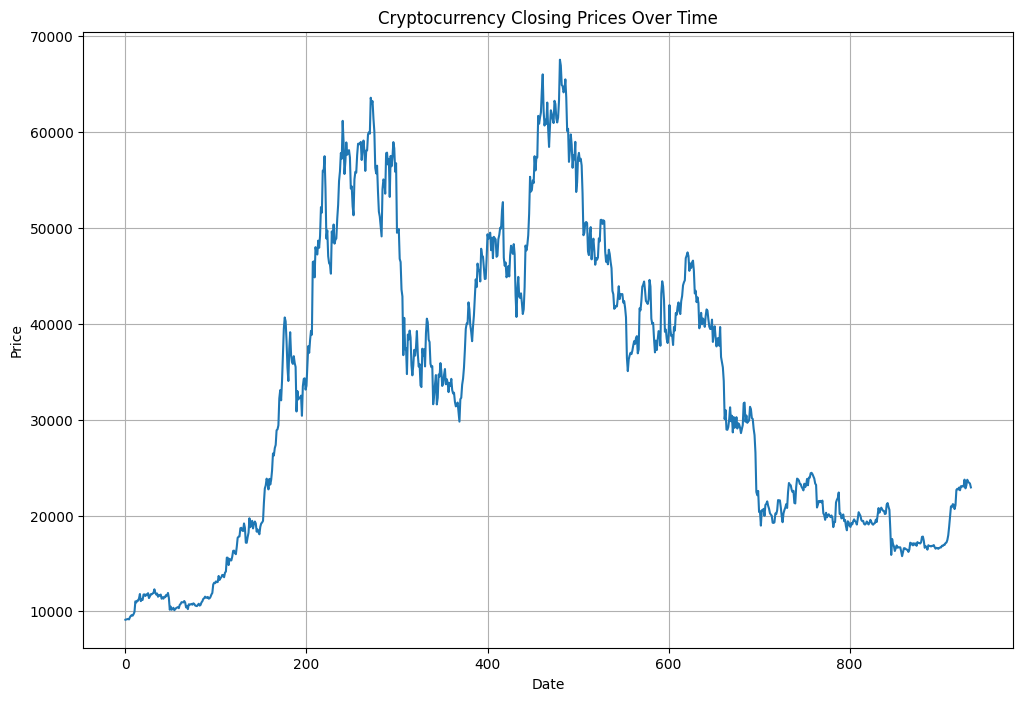

In [8]:
data['close'].plot(grid=True, figsize=(12,8))
plt.title('Cryptocurrency Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [9]:
print(data.isnull().sum())

datetime                   0
open                       0
high                       0
low                        0
close                      0
volume                     0
reserve                    0
funding_rates              0
mvrv                       0
nrpl                       0
nupl                       0
stock_to_flow_reversion    0
sth_sopr                   0
signal                     0
RSI                        0
9_ema                      0
21_ema                     0
50_ema                     0
200_ema                    0
Fear_and_Greed_Index       0
dtype: int64


In [10]:
# Stationarity check
from statsmodels.tsa.stattools import adfuller  # Import adfuller for stationarity check
from statsmodels.tsa.seasonal import seasonal_decompose

def check_stationarity(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    if result[1] <= 0.05 and result[4]['5%'] > result[0]:
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

check_stationarity(data['close'])

ADF Statistic: -1.7115873083326942
p-value: 0.42515245288896764
Critical Values:
	1%: -3.4373707314972766
	5%: -2.8646394422797337
	10%: -2.5684203292233905
Non-stationary


In [11]:
# Stationarity check of the first difference of time series
check_stationarity(data['close'].diff().dropna())

ADF Statistic: -31.645511288954264
p-value: 0.0
Critical Values:
	1%: -3.4373782772524315
	5%: -2.8646427696103305
	10%: -2.56842210151995
Stationary


In [12]:
# Stationarity check of the second difference of time series
check_stationarity(data['close'].diff().diff().dropna())

ADF Statistic: -11.206164446803271
p-value: 2.1821398142749636e-20
Critical Values:
	1%: -3.4375405714950604
	5%: -2.8647143318899913
	10%: -2.5684602193463375
Stationary


In [13]:
df = data.copy()

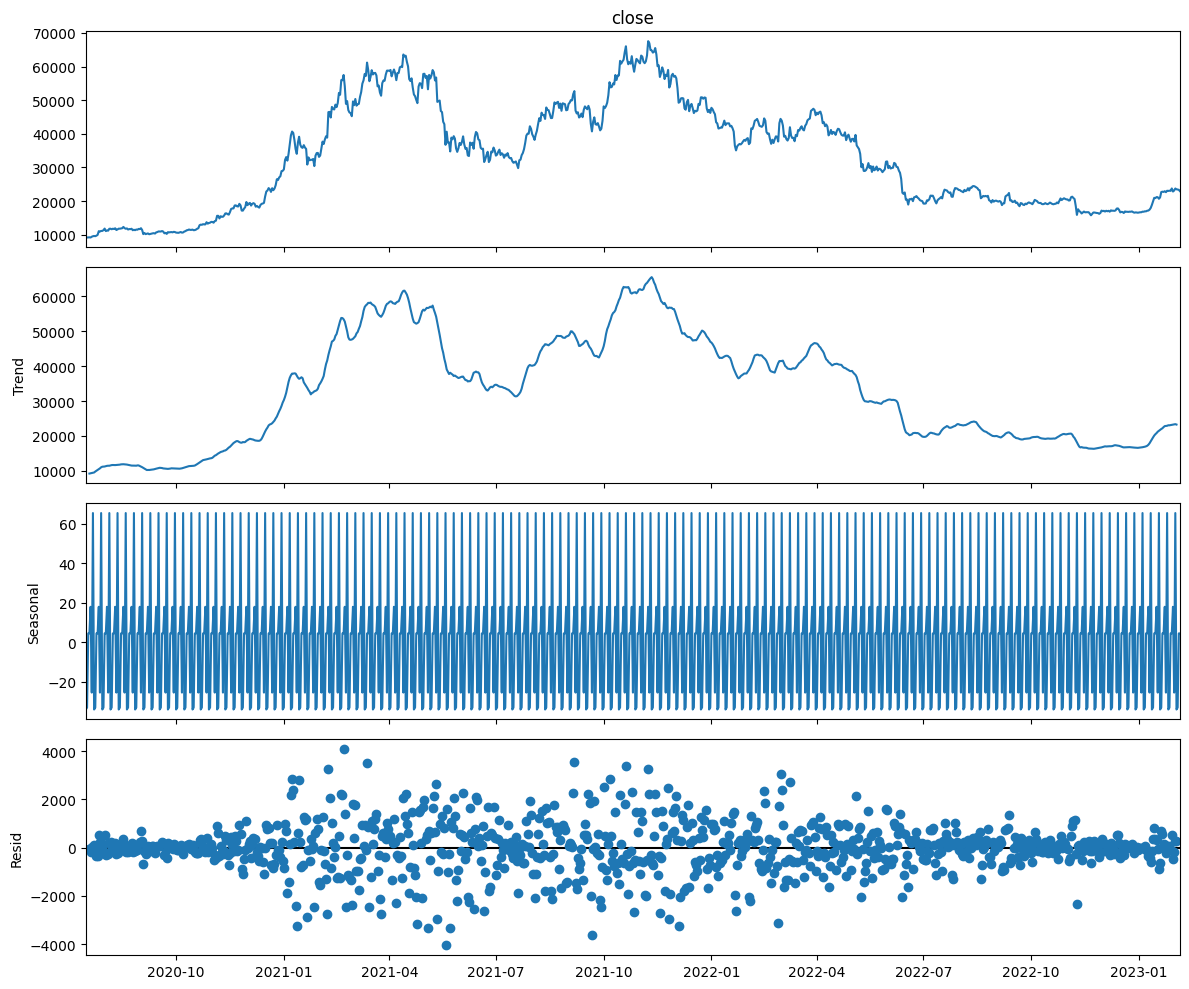

In [14]:
# Identification of Seasonality
df['datetime'] = pd.to_datetime(df['datetime'])  # Convert 'datetime' column to datetime type
df.set_index('datetime', inplace=True)  # Set 'datetime' column as index
df.sort_index(inplace=True)  # Sort the index in ascending order if it's not sorted already
decomp = seasonal_decompose(df['close'])
fig = decomp.plot()
fig.set_size_inches((12, 10))
fig.tight_layout()
plt.show()

In [15]:
data.corr(numeric_only = True)

,open,high,low,close,volume,reserve,funding_rates,mvrv,nrpl,nupl,stock_to_flow_reversion,sth_sopr,RSI,9_ema,21_ema,50_ema,200_ema,Fear_and_Greed_Index
open,1.000000,0.998384,0.996891,0.996064,-0.112825,0.281327,0.279455,0.617570,0.372467,0.592003,0.964488,0.103812,-0.034526,0.995336,0.983465,0.947617,0.746385,0.177029
high,0.998384,1.000000,0.996614,0.998242,-0.098912,0.287023,0.287127,0.627728,0.387529,0.599456,0.965950,0.119794,-0.023179,0.995044,0.982943,0.946636,0.741947,0.179080
low,0.996891,0.996614,1.000000,0.997867,-0.151540,0.273285,0.281331,0.613757,0.385027,0.588494,0.968300,0.121093,-0.016731,0.992441,0.979741,0.943763,0.747558,0.175281
close,0.996064,0.998242,0.997867,1.000000,-0.123796,0.282456,0.288214,0.628314,0.398791,0.599045,0.969299,0.132482,-0.007565,0.992933,0.979957,0.943060,0.740470,0.180070
volume,-0.112825,-0.098912,-0.151540,-0.123796,1.000000,-0.222071,0.021872,-0.098896,-0.076559,-0.234323,-0.138231,-0.026545,-0.068493,-0.103752,-0.099271,-0.101368,-0.109074,-0.083789
reserve,0.281327,0.287023,0.273285,0.282456,-0.222071,1.000000,0.230630,0.592587,0.258569,0.749519,0.274777,0.167798,0.097742,0.278057,0.270080,0.249410,0.067453,0.373095
funding_rates,0.279455,0.287127,0.281331,0.288214,0.021872,0.230630,1.000000,0.669238,0.635275,0.475684,0.311289,0.671745,0.516376,0.233094,0.175485,0.071996,-0.229208,0.640392
mvrv,0.617570,0.627728,0.613757,0.628314,-0.098896,0.592587,0.669238,1.000000,0.690392,0.915949,0.628184,0.594917,0.437173,0.593199,0.543671,0.431680,0.018488,0.760787
nrpl,0.372467,0.387529,0.385027,0.398791,-0.076559,0.258569,0.635275,0.690392,1.000000,0.550118,0.419213,0.804983,0.562955,0.329968,0.269634,0.167207,-0.109327,0.618047
nupl,0.592003,0.599456,0.588494,0.599045,-0.234323,0.749519,0.475684,0.915949,0.550118,1.000000,0.591730,0.449905,0.377521,0.576923,0.544018,0.466606,0.128093,0.664550
